# Import LIb

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [2]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical

# Define your dataset paths
train_path = "/content/drive/MyDrive/A2M/chest_xray/chest_xray/train"
test_path = "/content/drive/MyDrive/A2M/chest_xray/chest_xray/test"
val_path = "/content/drive/MyDrive/A2M/chest_xray/chest_xray/val"

In [5]:
img_width, img_height = 150, 150

In [11]:
# FOR WINDOWS ONLYY!!!!!!!!!!!!!!

import cv2
import os

def load_and_preprocess_data(path, img_dims):
    x_data = []
    y_data = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            label = 1 if folder.lower() == 'pneumonia' else 0  # Assuming 'pneumonia' is the positive class
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
                if img is None:
                    print(f"Error: Unable to read image '{img_path}'")
                    continue
                img = cv2.resize(img, img_dims)
                x_data.append(img)
                y_data.append(label)
    return np.array(x_data), np.array(y_data)

# Load and preprocess training data
x_train, y_train = load_and_preprocess_data(train_path, img_dims=(img_width, img_height))

# Load and preprocess testing data
x_test, y_test = load_and_preprocess_data(test_path, img_dims=(img_width, img_height))

# Load and preprocess validation data
x_val, y_val = load_and_preprocess_data(val_path, img_dims=(img_width, img_height))


Error: Unable to read image '/content/drive/MyDrive/A2M/chest_xray/chest_xray/train/PNEUMONIA/.DS_Store'


KeyboardInterrupt: 

In [6]:
# FOR MAC ONLYY!!!!!!!!!!!!!!

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have a custom function load_and_preprocess_data
def load_and_preprocess_data(path, img_dims=(img_width, img_height)):
    images = []
    labels = []
    for folder in os.listdir(path):
        label = 1 if folder.lower() == 'pneumonia' else 0  # Assuming 'pneumonia' is the positive class
        for img_file in os.listdir(os.path.join(path, folder)):
            img_path = os.path.join(path, folder, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            img = cv2.resize(img, (img_dims[0], img_dims[1]))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [10]:
#Load and preprocess training data
x_train, y_train = load_and_preprocess_data(train_path, img_dims=(img_width, img_height))

# Load and preprocess testing data
x_test, y_test = load_and_preprocess_data(test_path, img_dims=(img_width, img_height))

# Load and preprocess validation data
x_val, y_val = load_and_preprocess_data(val_path, img_dims=(img_width, img_height))

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [8]:
















# Load and preprocess training data
x_train, y_train = load_and_preprocess_data(train_path)

# Load and preprocess testing data
x_test, y_test = load_and_preprocess_data(test_path)

# Load and preprocess validation data
x_val, y_val = load_and_preprocess_data(val_path)

NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/A2M/chest_xray/chest_xray/train/.DS_Store'

# Data Preprocessing


In [9]:













x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

NameError: name 'train' is not defined

In [7]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

NameError: name 'x_train' is not defined

In [11]:
# Resize data for deep learning
x_train = x_train.reshape(-1, img_width, img_height, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_width, img_height, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_width, img_height, 1)
y_test = np.array(y_test)


In [12]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Data Overview

In [13]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("X_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (0, 150, 150, 1)
y_train shape: (0,)
X_test shape: (0, 150, 150, 1)
y_test shape: (0,)
X_val shape: (0, 150, 150, 1)
y_val shape: (0,)


IndexError: index 0 is out of bounds for axis 0 with size 0

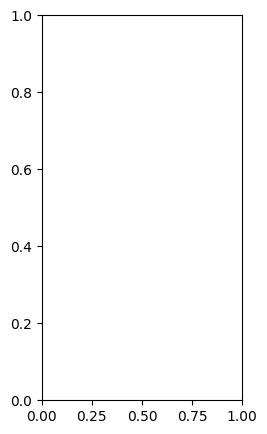

In [14]:
# Display the first 5 images in a single plot
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(img_width, img_height), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

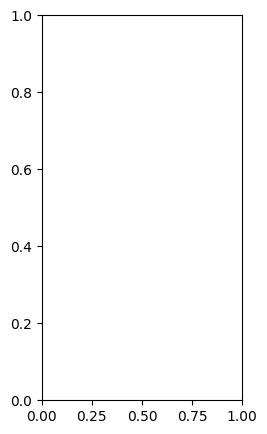

In [15]:
# Display the first 5 images in a single plot
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(img_width, img_height), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()


# Data Preprocessing

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D, BatchNormalization, Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
# ... other imports ...


# Model ARch

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 64)        2

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 64)        2

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [19]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 64) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 2s 76ms/step - loss: 0.4374 - accuracy: 0.9135
Loss of the model is -  0.43744516372680664
20/20 [==============================] - 2s 78ms/step - loss: 0.4374 - accuracy: 0.9135
Accuracy of the model is -  91.34615659713745 %


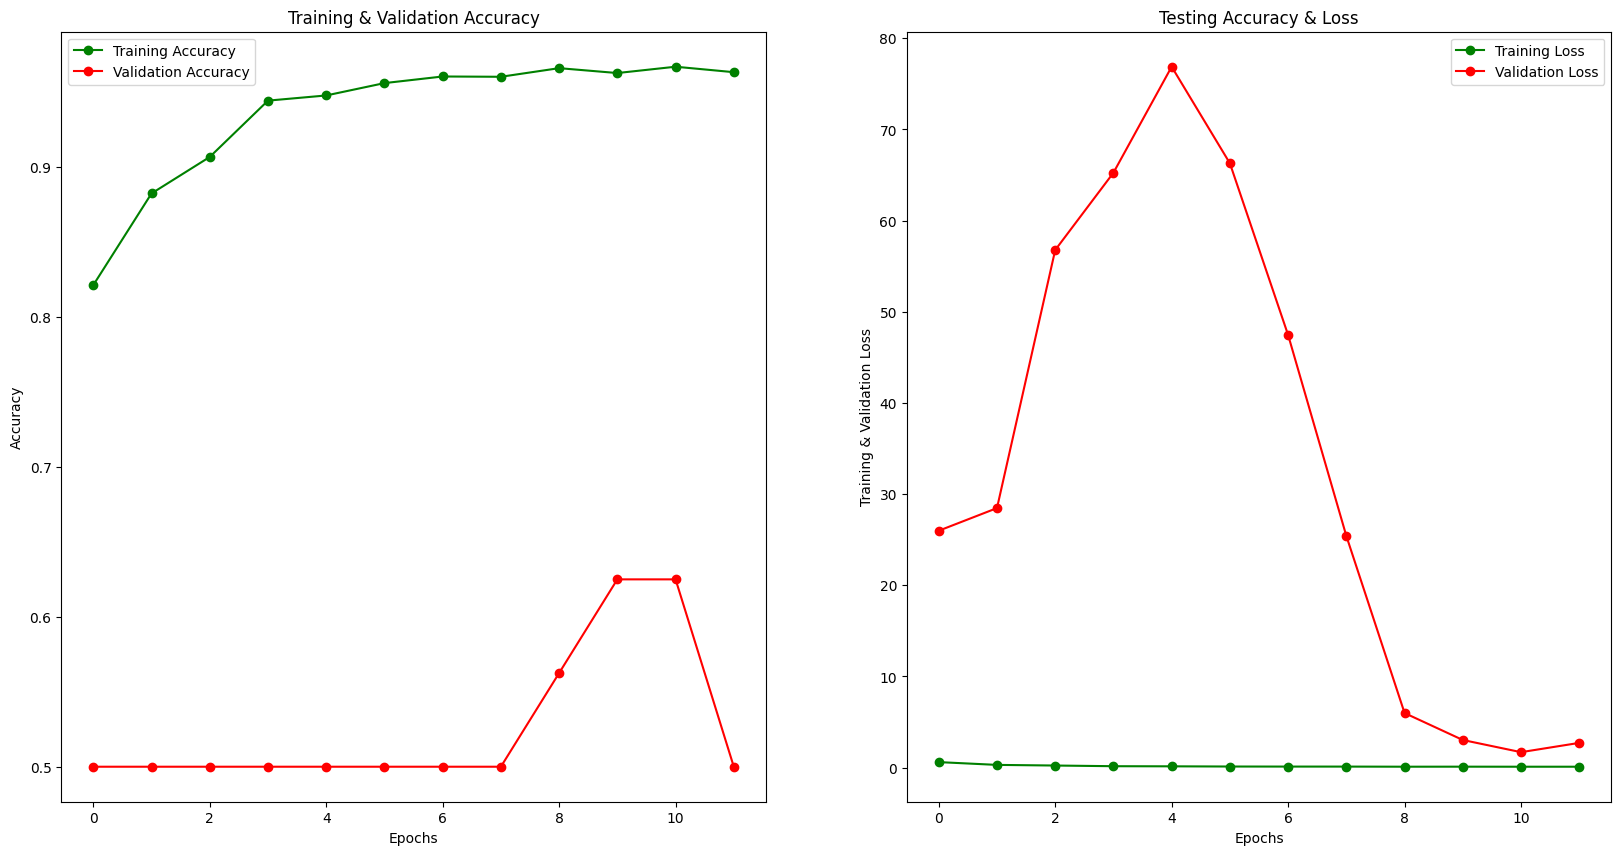

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
!pip install jupyter
!pip install nbconvert


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.9/512.9 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.3/257.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 11.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install nbconvert